<a href="https://colab.research.google.com/github/heroza/Skin-Cancer-Diagnosis/blob/main/Skin_Cancer_Diagnosis_using_ISIC_2020_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare the dataset. 
Currently, we use skin cancer ISIC dataset from Kaggle https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic

Tutorial for how to load Kaggle dataset can be found in https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data

In [2]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/content/drive/MyDrive/PHD/Datasets/isic2018/ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth.csv') 

In [26]:
df["label"] = (df.iloc[:, 1:]).idxmax(axis=1)

0         NV
1         NV
2         NV
3         NV
4        MEL
        ... 
10010    MEL
10011    MEL
10012    BKL
10013     NV
10014     NV
Length: 10015, dtype: object

In [19]:
df

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Label Distribution

[Text(0, 0, 'seborrheic keratosis'),
 Text(0, 0, 'dermatofibroma'),
 Text(0, 0, 'actinic keratosis'),
 Text(0, 0, 'vascular lesion'),
 Text(0, 0, 'squamous cell carcinoma'),
 Text(0, 0, 'nevus'),
 Text(0, 0, 'basal cell carcinoma'),
 Text(0, 0, 'melanoma'),
 Text(0, 0, 'pigmented benign keratosis')]

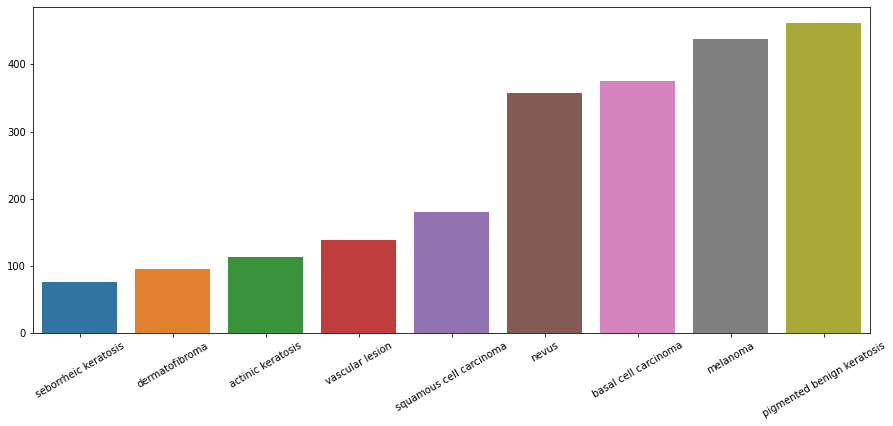

In [ ]:
# ordered count of rows per unique label
labels_count = df['Labels'].value_counts(ascending=True)

f = plt.figure(figsize=(15, 6))
s = sns.barplot(x=labels_count.index,y=labels_count.values)
s.set_xticklabels(s.get_xticklabels(), rotation = 30)

Plot 3 images per label

In [ ]:
def plot_images_per_label(df, label, cols: int, size: tuple):
    fig, axs = plt.subplots(nrows=1, ncols=cols, figsize=size)

    cntMax = cols
    cntCur = 0
    for index, row in df.iterrows():
        if(row['Labels'] == label and cntCur < cntMax):
            axs[cntCur].imshow(plt.imread(df.FilePaths[index]))
            axs[cntCur].set_title(df.Labels[index])

            cntCur += 1
        else:
            if(cntCur >= cntMax):
                break
    
    plt.tight_layout()
    plt.show()


# unique labels
labels = sorted(df['Labels'].unique())


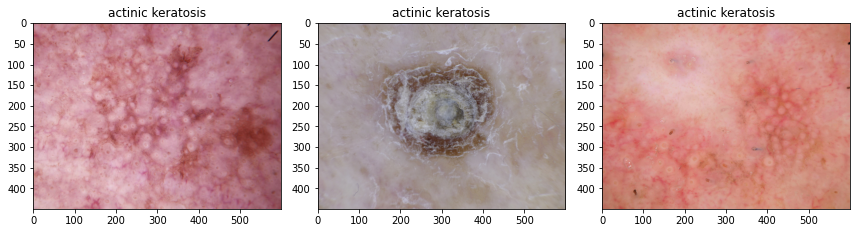

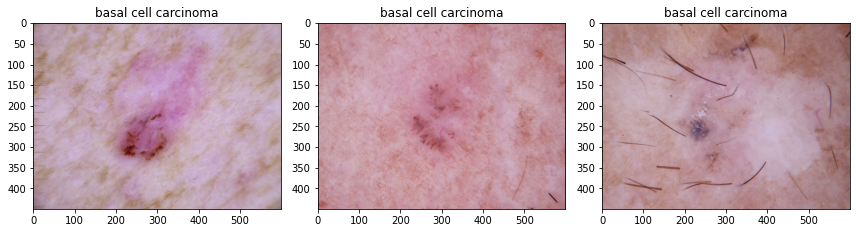

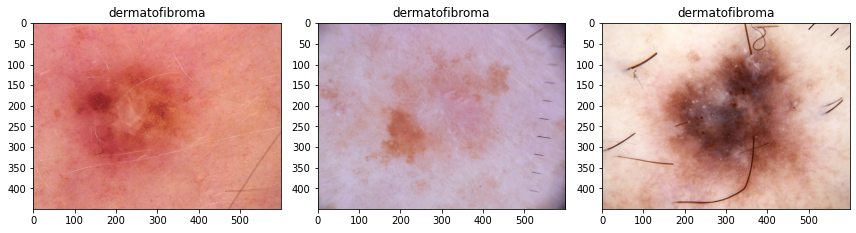

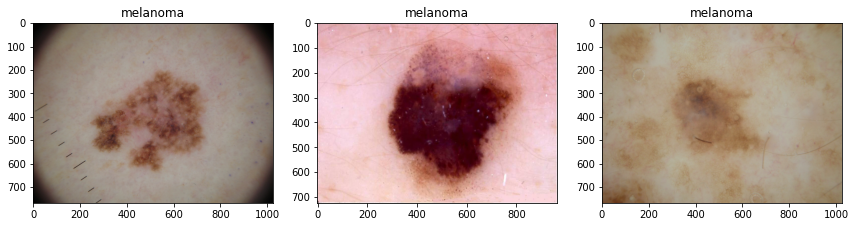

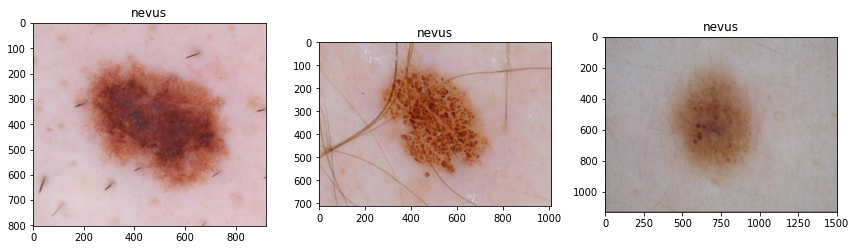

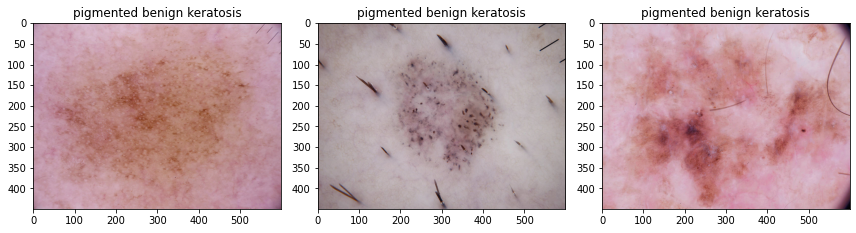

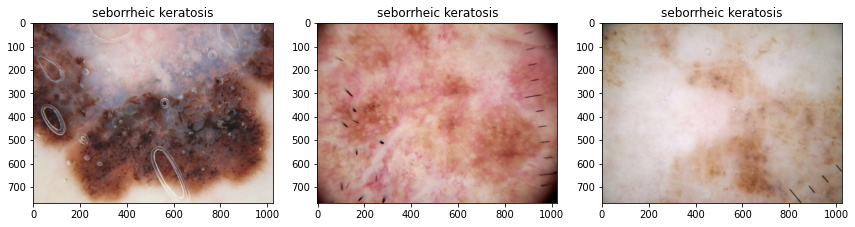

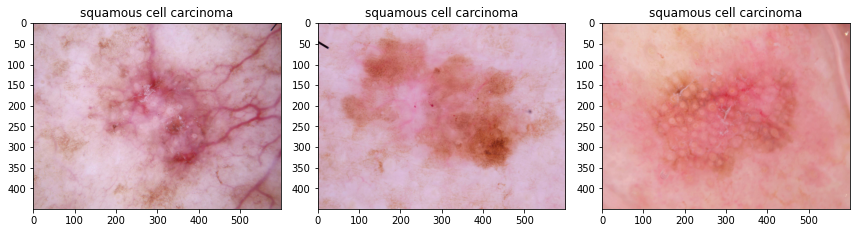

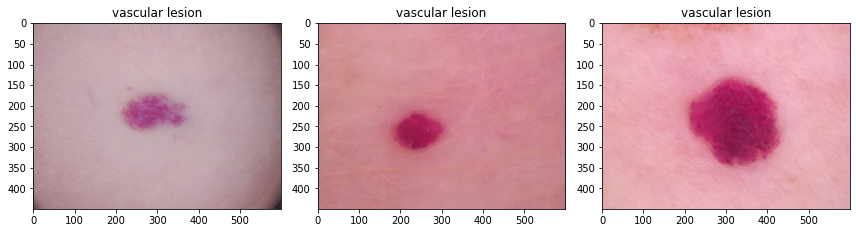

In [ ]:
# loop through labels
for label in labels:
    plot_images_per_label(df, label, 3, (12,9))

Dataset Balancer

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


Prepare X,y

In [ ]:
# input image size
IMAGE_W = 32
IMAGE_H = 32
IMG_SIZE = (IMAGE_W,IMAGE_H)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
X = []
for img in df['FilePaths']:
    img_arr = load_img(img, target_size=IMG_SIZE)
    img_arr = img_to_array(img_arr)
    X.append(img_arr)

X = np.array(X)
print(np.array(X).shape)

(2239, 32, 32, 3)


In [ ]:
y = df['Labels']
y = np.array(y.values)
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)
print(y.shape)

Counter({'pigmented benign keratosis': 462, 'melanoma': 438, 'basal cell carcinoma': 376, 'nevus': 357, 'squamous cell carcinoma': 181, 'vascular lesion': 139, 'actinic keratosis': 114, 'dermatofibroma': 95, 'seborrheic keratosis': 77})
(2239,)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y= label_encoder.fit_transform(y)
y

array([5, 5, 3, ..., 1, 3, 1])

Resample

In [ ]:
from imblearn.over_sampling import SMOTE
def SMOTE_Data(X, y):
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X.reshape((-1, IMAGE_W * IMAGE_H * 3)), y)
    X_resampled.reshape(-1, IMAGE_W, IMAGE_H, 3)
    return X_resampled, y_resampled

In [ ]:
X, y = SMOTE_Data(X_train, y_train) #beware of the actual parameter
print(X.shape)
print(y.shape)

(3744, 3072)
(3744,)


In [ ]:
counter = Counter(y)
print(counter)

Counter({7: 416, 6: 416, 5: 416, 1: 416, 2: 416, 0: 416, 3: 416, 4: 416, 8: 416})


In [ ]:
X = X.reshape(-1, IMAGE_W, IMAGE_H, 3)
print('X shape: ',X.shape)

X shape:  (3744, 32, 32, 3)


In [ ]:
X = X.astype(int)

In [ ]:
X[:1]

array([[[[214, 175, 168],
         [216, 177, 170],
         [216, 181, 175],
         ...,
         [222, 189, 182],
         [218, 185, 176],
         [215, 183, 172]],

        [[214, 175, 170],
         [215, 174, 168],
         [222, 185, 177],
         ...,
         [224, 191, 186],
         [218, 188, 180],
         [214, 180, 171]],

        [[211, 173, 164],
         [215, 174, 168],
         [220, 172, 170],
         ...,
         [224, 187, 181],
         [220, 185, 179],
         [217, 182, 176]],

        ...,

        [[214, 184, 173],
         [220, 193, 184],
         [222, 194, 183],
         ...,
         [208, 160, 150],
         [213, 168, 162],
         [211, 168, 159]],

        [[214, 184, 173],
         [219, 191, 180],
         [219, 191, 179],
         ...,
         [199, 140, 124],
         [210, 169, 163],
         [207, 167, 157]],

        [[213, 179, 167],
         [216, 186, 176],
         [219, 191, 179],
         ...,
         [199, 143, 128],
        

In [ ]:
y = y.reshape(-1, 1)
print('y shape: ',y.shape)

y shape:  (3744, 1)


In [ ]:
"""
for label in labels:
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,9))
  indices = np.where(y_train  == label)[0]
  for i in range(3):
    random_image = X_train[np.random.choice(indices)]
    axs[i].imshow(random_image)
    axs[i].set_title(label)
  plt.tight_layout()
  plt.show()
"""

'\nfor label in labels:\n  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,9))\n  indices = np.where(y_train  == label)[0]\n  for i in range(3):\n    random_image = X_train[np.random.choice(indices)]\n    axs[i].imshow(random_image)\n    axs[i].set_title(label)\n  plt.tight_layout()\n  plt.show()\n'

Split dataset to train and val

In [ ]:
# stratified train and rem (20%) datasets
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

print('Train Data: ', X_train.shape)
print('Remaining Data: ', X_rem.shape)

Train Data:  (3326, 32, 32, 3)
Remaining Data:  (832, 32, 32, 3)


In [ ]:
# stratified val and test (50%) 
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.5, stratify=y_rem, random_state=1)

print('Test Data: ', X_test.shape)
print('Val Data: ', X_val.shape)

Test Data:  (416, 32, 32, 3)
Val Data:  (416, 32, 32, 3)


In [ ]:
#optional
# stratified train and test (10%) datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)

print('Train Data: ', X_train.shape)
print('Test Data: ', X_test.shape)

Train Data:  (2015, 32, 32, 3)
Test Data:  (224, 32, 32, 3)


In [ ]:
#optional
# stratified train and val (10%) datasets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)

print('Train Data: ', X_train.shape)
print('Val Data: ', X_val.shape)

Train Data:  (3369, 32, 32, 3)
Val Data:  (375, 32, 32, 3)


In [ ]:
print(Counter(y_train[:,0]))

Counter({2: 375, 8: 375, 6: 375, 1: 374, 3: 374, 5: 374, 0: 374, 7: 374, 4: 374})


Create and compile the model

# ResNet Transfer Learning
Model from https://github.com/AnasBrital98/CNN-From-Scratch/tree/master/Inception-V3

In [ ]:
# count of epchos
EPOCHS = 100
# number of samples/images per iteration
BATCH_SIZE = 25

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Dropout, Flatten
from tensorflow.keras.models import Model
import numpy as np

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(IMAGE_H, IMAGE_W, 3))
# create the base pre-trained model
base_model = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(9, activation='softmax')(x)
#predictions = Dense(9)(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# train the model on the new data for a few epochs
hst = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))

94781440/94765736 [==============================] - 0s 0us/step
Epoch 1/100
135/135 [==============================] - 17s 26ms/step - loss: 2.7364 - accuracy: 0.3844 - val_loss: 1.3357 - val_accuracy: 0.5387
Epoch 2/100
135/135 [==============================] - 2s 17ms/step - loss: 1.3947 - accuracy: 0.5156 - val_loss: 1.2124 - val_accuracy: 0.5627
Epoch 3/100
135/135 [==============================] - 2s 18ms/step - loss: 1.2279 - accuracy: 0.5699 - val_loss: 1.1190 - val_accuracy: 0.6053
Epoch 4/100
135/135 [==============================] - 2s 17ms/step - loss: 1.1460 - accuracy: 0.5847 - val_loss: 1.0988 - val_accuracy: 0.6347
Epoch 5/100
135/135 [==============================] - 2s 17ms/step - loss: 1.0851 - accuracy: 0.6171 - val_loss: 1.0768 - val_accuracy: 0.6373
Epoch 6/100
135/135 [==============================] - 2s 17ms/step - loss: 0.9634 - accuracy: 0.6625 - val_loss: 0.9576 - val_accuracy: 0.6720
Epoch 7/100
135/135 [==============================] - 2s 17ms/step - 

In [ ]:
model.save('/content/drive/MyDrive/models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/assets


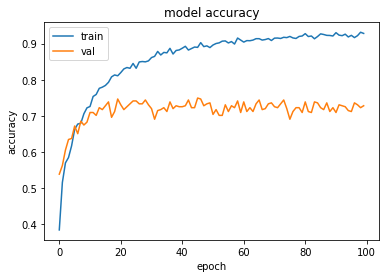

In [ ]:
# summarize history for accuracy
plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# we chose to train the top 2 resnet blocks, i.e. we will freeze
# the first 49 layers and unfreeze the rest:
limit = 171
for layer in model.layers[:limit]:
   layer.trainable = False
for layer in model.layers[limit:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
hst2 = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))

Epoch 1/100
135/135 [==============================] - 8s 25ms/step - loss: 0.2932 - accuracy: 0.9089 - val_loss: 1.7397 - val_accuracy: 0.7280
Epoch 2/100
135/135 [==============================] - 2s 17ms/step - loss: 0.2210 - accuracy: 0.9246 - val_loss: 1.8335 - val_accuracy: 0.7280
Epoch 3/100
135/135 [==============================] - 2s 18ms/step - loss: 0.2108 - accuracy: 0.9276 - val_loss: 1.8729 - val_accuracy: 0.7227
Epoch 4/100
135/135 [==============================] - 2s 17ms/step - loss: 0.1872 - accuracy: 0.9362 - val_loss: 1.8660 - val_accuracy: 0.7387
Epoch 5/100
135/135 [==============================] - 2s 17ms/step - loss: 0.1845 - accuracy: 0.9341 - val_loss: 1.8276 - val_accuracy: 0.7387
Epoch 6/100
135/135 [==============================] - 2s 17ms/step - loss: 0.1548 - accuracy: 0.9424 - val_loss: 1.8162 - val_accuracy: 0.7360
Epoch 7/100
135/135 [==============================] - 2s 17ms/step - loss: 0.1593 - accuracy: 0.9392 - val_loss: 1.7957 - val_accuracy:

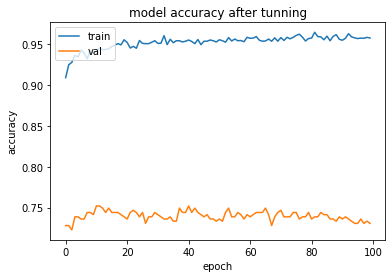

In [ ]:
# summarize history for accuracy
plt.plot(hst2.history['accuracy'])
plt.plot(hst2.history['val_accuracy'])
plt.title('model accuracy after tunning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Load test data

In [ ]:
X_test = load_data('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

Print head data

In [ ]:
X_test.head(3)

,FilePaths,Labels
0,Skin cancer ISIC The International Skin Imagin...,vascular lesion
1,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma


In [ ]:
print('Test Data: ', X_test.shape)

# ordered count of rows per unique label
X_test['Labels'].value_counts(ascending=True)

Test Data:  (118, 2)


vascular lesion                3
seborrheic keratosis           3
pigmented benign keratosis    16
squamous cell carcinoma       16
actinic keratosis             16
melanoma                      16
nevus                         16
dermatofibroma                16
basal cell carcinoma          16
Name: Labels, dtype: int64

Preprocess test image

In [ ]:
X_test_arr = []
for img in X_test['FilePaths']:
    loaded_img = load_img(img, target_size=IMG_SIZE)
    img_arr = img_to_array(loaded_img)
    X_test_arr.append(img_arr)
    
print(np.array(X_test_arr).shape)  
y_test = X_test['Labels']
X_test = X_test_arr

y_test = np.array(y_test.values)
X_test = np.array(X_test)

(118, 224, 224, 3)


In [ ]:
#resampling test set

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=2)
X_test, y_test = sm.fit_resample(X_test.reshape((-1, IMAGE_W * IMAGE_H * 3)), y_test)
X_test.reshape(-1, IMAGE_W, IMAGE_H, 3)
print(X_test.shape)
print(y_test.shape)

(144, 150528)
(144,)


In [ ]:
X_test

array([[171.     , 149.     , 170.     , ...,  37.     ,  34.     ,
         53.     ],
       [172.     , 135.     , 169.     , ..., 173.     , 138.     ,
        171.     ],
       [184.     , 149.     , 155.     , ..., 198.     , 158.     ,
        166.     ],
       ...,
       [190.80458, 136.39708, 150.79555, ..., 131.82196,  90.41307,
        102.2114 ],
       [204.09334, 129.02664, 138.69998, ..., 195.18666, 128.88664,
        135.74664],
       [204.05249, 128.57738, 138.39366, ..., 195.10498, 128.49864,
        135.4199 ]], dtype=float32)

In [ ]:
X_test = X_test.reshape(-1, IMAGE_W, IMAGE_H, 3)

In [ ]:
y_test = y_test.reshape(-1,1)
y_test= label_encoder.fit_transform(y_test)
y_test

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([8, 5, 7, 0, 3, 5, 4, 2, 1, 0, 5, 5, 2, 4, 6, 1, 0, 5, 2, 0, 4, 3,
       4, 7, 3, 5, 2, 2, 0, 7, 1, 1, 3, 0, 4, 0, 1, 2, 5, 3, 0, 1, 2, 7,
       3, 2, 4, 7, 3, 0, 1, 7, 1, 3, 2, 7, 4, 7, 7, 1, 7, 3, 8, 6, 2, 5,
       5, 0, 5, 4, 4, 3, 7, 5, 3, 2, 7, 3, 0, 8, 2, 1, 1, 3, 1, 0, 4, 7,
       2, 7, 4, 1, 0, 7, 2, 5, 4, 3, 3, 3, 1, 2, 5, 0, 0, 4, 0, 2, 5, 5,
       4, 5, 7, 1, 4, 4, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [ ]:
#y_test = y_test.reshape(-1,1)

In [ ]:
#X_test = X_test.astype('float32') / 255.

Evaluate model againts test data

In [ ]:
res = model.evaluate(X_test,y_test)

7/7 [==============================] - 1s 15ms/step - loss: 3.5914 - accuracy: 0.4509


The accuracy

In [ ]:
# accuracy
print(f'Train Accuracy: {hst2.history["accuracy"][-1:][0] * 100:.2f}')
print(f'Val Accuracy: {hst2.history["val_accuracy"][-1:][0] * 100:.2f}')
print(f'Test Accuracy: {res[1] * 100:.2f}')
# loss
print(f'Train Loss: {hst2.history["loss"][-1:][0] * 100:.2f}')
print(f'Val Loss: {hst2.history["val_loss"][-1:][0] * 100:.2f}')
print(f'Test Loss: {res[0] * 100:.2f}')

Train Accuracy: 95.73
Val Accuracy: 73.07
Test Accuracy: 45.09
Train Loss: 9.05
Val Loss: 161.83
Test Loss: 359.14


Calculate y_pred from training and testing for analysis

In [ ]:
# predicted labels
Y_pred = model.predict(X_train)
print("Y_pred", Y_pred.shape)
# rounded labels
y_pred = np.argmax(Y_pred, axis=1)
print("y_pred", y_pred.size)

Y_pred (3369, 9)
y_pred 3369


In [ ]:
# predicted labels
Y_pred2 = model.predict(X_test)
print("Y_pred2", Y_pred2.shape)
# rounded labels
y_pred2 = np.argmax(Y_pred2, axis=1)
print("y_pred2", y_pred2.size)

Y_pred2 (224, 9)
y_pred2 224


Calculate y_true

In [ ]:
# true labels
#y_true = X_test.classes
print("y_pred", len(y_pred))
# label classes
#class_labels = list(X_test.class_indices.keys())
print("labels", len(y_train))

y_pred 3369
labels 3369


In [ ]:
y_pred[:10]

array([4, 6, 6, 5, 6, 6, 6, 4, 1, 5])

F1 Score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print('Score on training data: ',precision_recall_fscore_support(y_train, y_pred, average='macro'))
print('Score on test data: ',precision_recall_fscore_support(y_test, y_pred2, average='macro'))

F1 score on training data:  (0.9701682836092256, 0.9697096454743515, 0.969698993353442, None)
F1 score on test data:  (0.41649242066664927, 0.40812303779504394, 0.4073571456305621, None)


The confusion metric

In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_train, y_pred)

print(cf_matrix)

[[356   0   0   0  18   0   0   0   0]
 [  0 374   0   0   0   0   0   0   0]
 [  0   0 375   0   0   0   0   0   0]
 [  0   0   0 335   0   0  39   0   0]
 [ 29   0   0   0 345   0   0   0   0]
 [  0   0   0   0   0 374   0   0   0]
 [  0   0   0  16   0   0 359   0   0]
 [  0   0   0   0   0   0   0 374   0]
 [  0   0   0   0   0   0   0   0 375]]


In [ ]:
cf_matrix2 = confusion_matrix(y_test, y_pred2)
print(cf_matrix2)

[[ 3  2  1  0  4  0  0  1  0]
 [ 2 16  0  4  0  7  0  6  3]
 [ 2  1  4  1  0  0  0  1  0]
 [ 0  2  0 25  4  5  7  1  0]
 [ 5  1  0  6 19  4  0  1  0]
 [ 3 10  2  4  1 18  1  5  2]
 [ 0  0  0  8  0  0  0  0  0]
 [ 4  5  0  2  0  1  0  6  0]
 [ 0  2  0  0  1  0  0  1 10]]


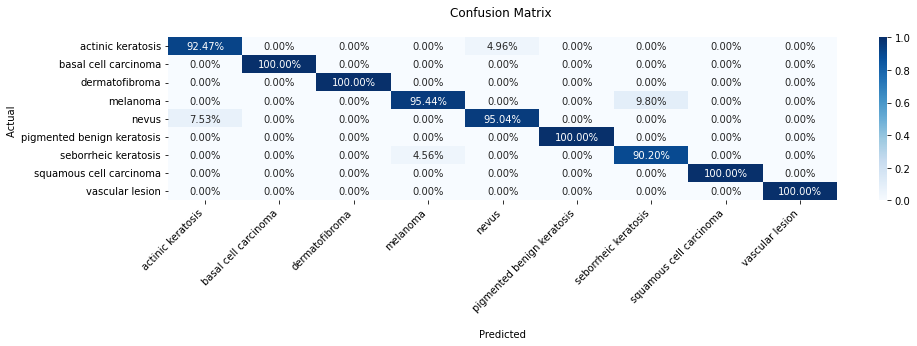

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix, axis=0), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix \n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['actinic keratosis','basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'])
ax.yaxis.set_ticklabels(['actinic keratosis','basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'])

plt.rcParams["figure.figsize"] = (15,3)

## Display the visualization of the Confusion Matrix.
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.show()

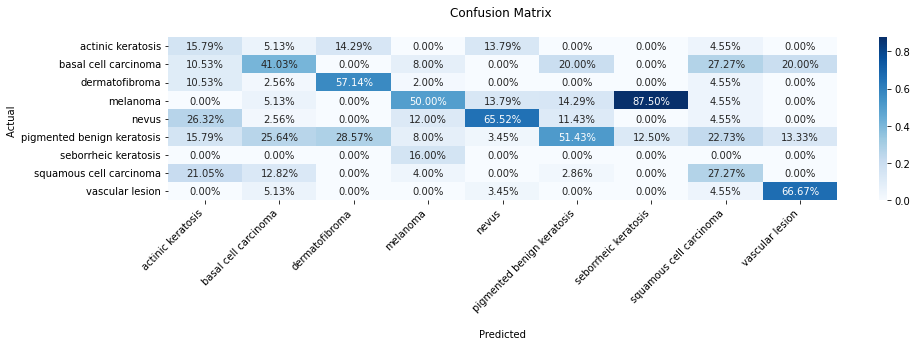

In [ ]:
ax = sns.heatmap(cf_matrix2/np.sum(cf_matrix2, axis=0), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix \n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['actinic keratosis','basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'])
ax.yaxis.set_ticklabels(['actinic keratosis','basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'])

plt.rcParams["figure.figsize"] = (15,3)

## Display the visualization of the Confusion Matrix.
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.show()

[Text(0, 0, 'actinic keratosis'),
 Text(0, 0, 'basal cell carcinoma'),
 Text(0, 0, 'dermatofibroma'),
 Text(0, 0, 'melanoma'),
 Text(0, 0, 'nevus'),
 Text(0, 0, 'pigmented benign keratosis'),
 Text(0, 0, 'seborrheic keratosis'),
 Text(0, 0, 'squamous cell carcinoma'),
 Text(0, 0, 'vascular lesion')]

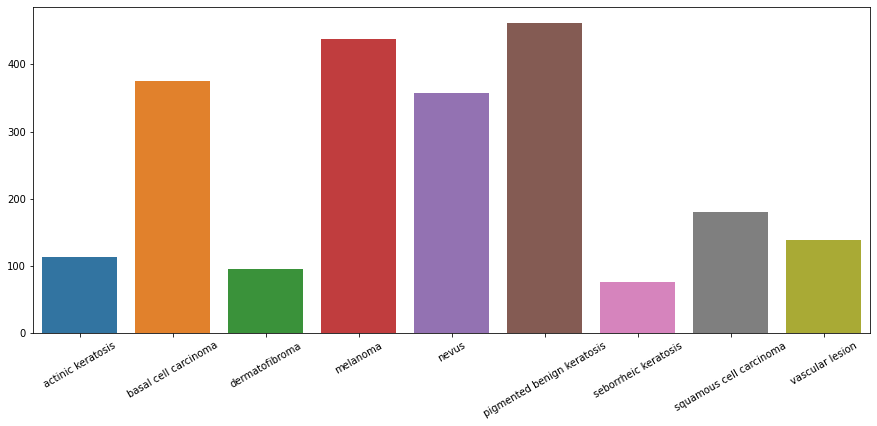

In [ ]:
# ordered count of rows per unique label
labels_count = df['Labels'].value_counts().sort_index()

f = plt.figure(figsize=(15, 6))
s = sns.barplot(x=labels_count.index,y=labels_count.values)
s.set_xticklabels(s.get_xticklabels(), rotation = 30)